# Titanic - Machine Learning from Disaster
*Author: Vishal*

### Data Dictionary
|Variable|Definition|Key|
|--------|----------|---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	|
|Age|	Age in years|	
|sibsp	|# of siblings / spouses aboard the Titanic	|
|parch	|# of parents / children aboard the Titanic	|
|ticket	|Ticket number	|
|fare	|Passenger fare	|
|cabin	|Cabin number	|
|embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

### Importing the dependencies

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pickle

In [3]:
# Load the training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training data and the shape of both datasets
train_data.head(), train_data.shape, test_data.head(), test_data.shape

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [4]:
# Checking missing values in both training and testing datasets
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

missing_train, missing_test


(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [5]:
# Imputers for Age and Fare (using median strategy)
imputer_age = SimpleImputer(strategy='median')
imputer_fare = SimpleImputer(strategy='median')

# Apply imputation on 'Age' and 'Fare'
train_data['Age'] = imputer_age.fit_transform(train_data[['Age']])
test_data['Age'] = imputer_age.transform(test_data[['Age']])
test_data['Fare'] = imputer_fare.fit_transform(test_data[['Fare']])

# Impute 'Embarked' in training data with the most frequent value
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)

# Dropping 'Cabin' due to a large number of missing values
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

# Recheck missing values after imputation
train_data.isnull().sum(), test_data.isnull().sum()


(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

In [6]:
train_data.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

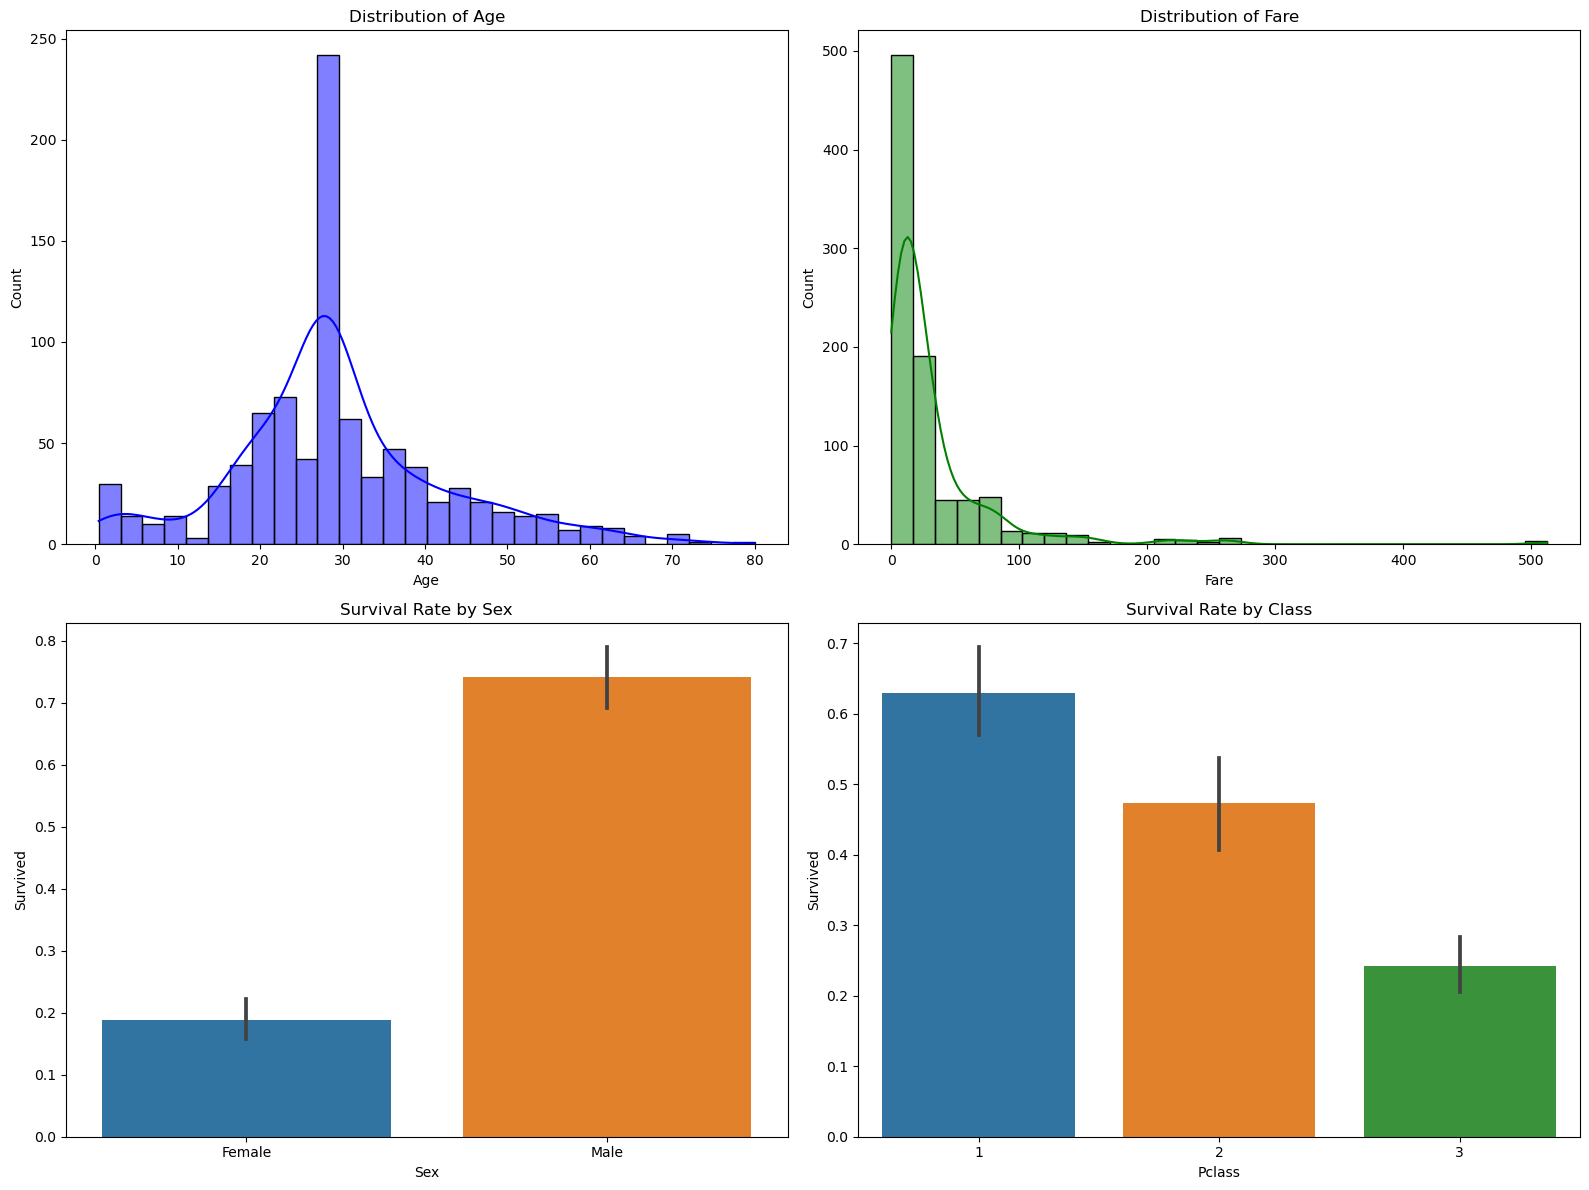

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Subplot 1: Age distribution
plt.subplot(2, 2, 1)
sns.histplot(train_data['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')

# Subplot 2: Fare distribution
plt.subplot(2, 2, 2)
sns.histplot(train_data['Fare'], bins=30, kde=True, color='green')
plt.title('Distribution of Fare')

# Subplot 3: Survival by Sex
plt.subplot(2, 2, 3)
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.xticks([0, 1], ['Female', 'Male'])

# Subplot 4: Survival by Pclass
plt.subplot(2, 2, 4)
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Class')

plt.tight_layout()
plt.show()


C:\Users\visha\AppData\Local\Temp\ipykernel_29844\1540090464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


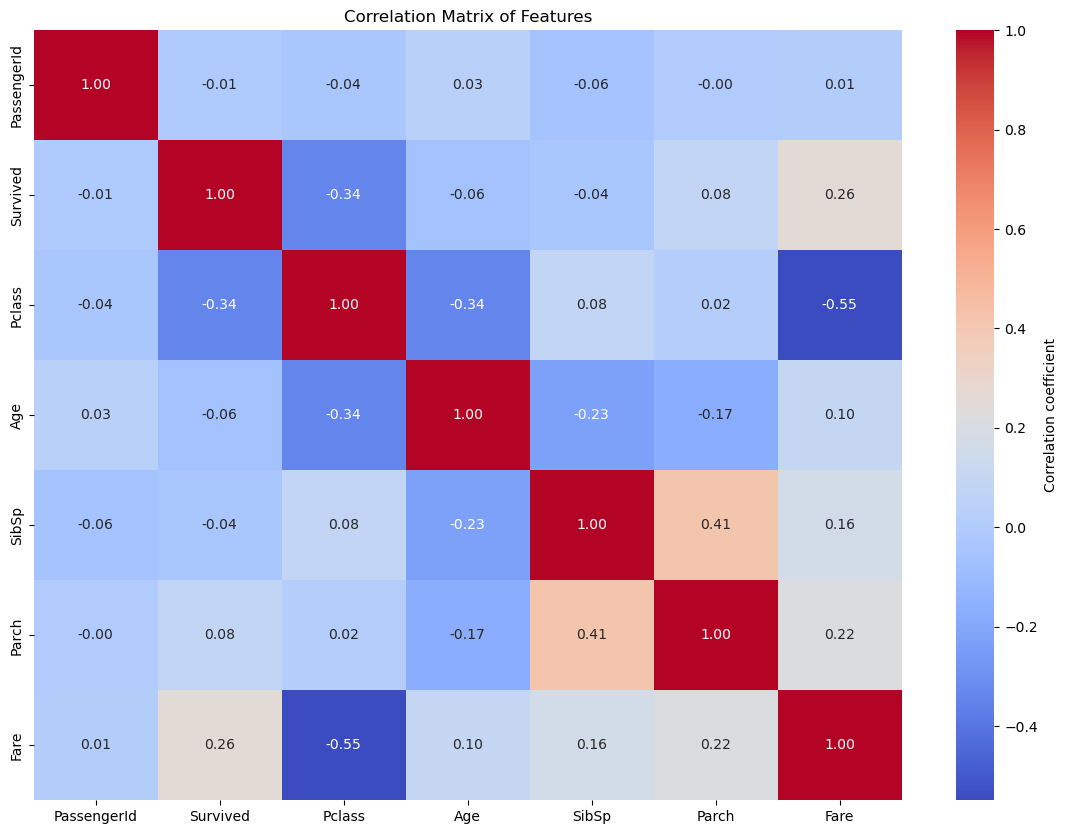

In [8]:
# Correlation matrix to see relationships between features
correlation_matrix = train_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Features')
plt.show()


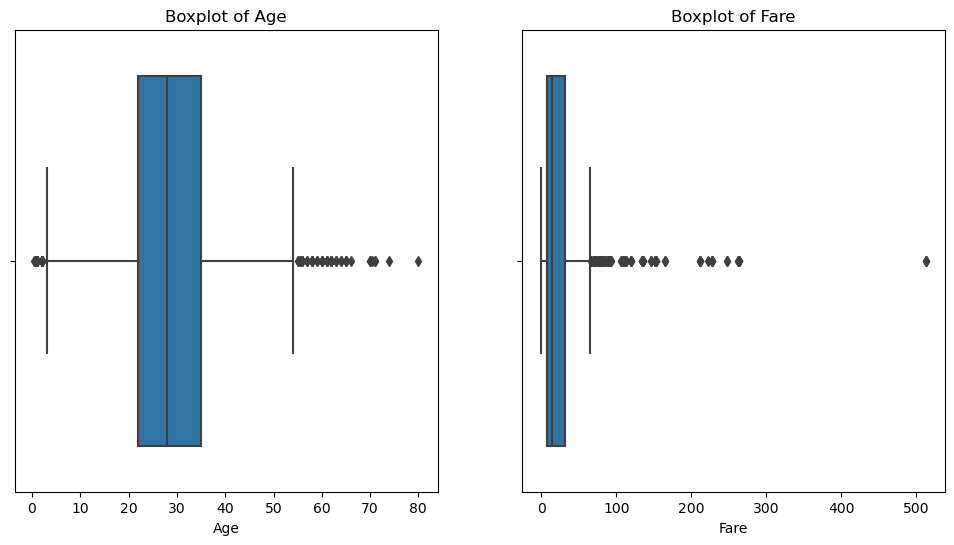

In [9]:
# Set up the matplotlib figure for box plots
plt.figure(figsize=(12, 6))

# Subplot 1: Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=train_data['Age'])
plt.title('Boxplot of Age')

# Subplot 2: Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=train_data['Fare'])
plt.title('Boxplot of Fare')

plt.show()


In [10]:
# Extract titles from the 'Name' column
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# View title frequency in training data
train_data['Title'].value_counts(), test_data['Title'].value_counts()


(Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Mlle          2
 Major         2
 Col           2
 Countess      1
 Capt          1
 Ms            1
 Sir           1
 Lady          1
 Mme           1
 Don           1
 Jonkheer      1
 Name: Title, dtype: int64,
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
 Name: Title, dtype: int64)

In [11]:
# Replace rare titles with 'Other'
rare_titles = ['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer', 'Dona']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Other')
test_data['Title'] = test_data['Title'].replace(rare_titles, 'Other')

# Perform one-hot encoding on categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Title'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Title'])

# Ensure both data sets have the same dummy variables
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)

# Preview updated training data
train_data.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1,0,0


In [12]:
# Dropping unnecessary columns
train_data.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Preview the final training data
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0


In [13]:
# Prepare feature matrix X and target vector y
X_train = train_data.drop(['PassengerId', 'Survived'], axis=1)
y_train = train_data['Survived']

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

# Average cross-validation score
cv_score_mean = cv_scores.mean()
cv_score_mean


0.8035904839620865

In [14]:
# Train the model on the entire training data
rf_clf.fit(X_train, y_train)

# Prepare the test data features
X_test = test_data.drop(['PassengerId'], axis=1)

# Check columns in both datasets
set(X_train.columns) - set(X_test.columns), set(X_test.columns) - set(X_train.columns)


(set(), {'Survived'})

In [15]:

# Correct the test dataset by dropping the 'Survived' column if it exists
if 'Survived' in X_test.columns:
    X_test.drop(['Survived'], axis=1, inplace=True)

# Now, let's make predictions again
test_predictions = rf_clf.predict(X_test)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

results_df.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [16]:
# Save the results to a CSV file
results_file_path = 'gender_submission.csv'
results_df.to_csv(results_file_path, index=False)



In [17]:
# Save the model
with open('titanic_survival_prediction_model.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)


### Short and Crisp

# The End